# Avacado Prices : Descriptive Analysis
---

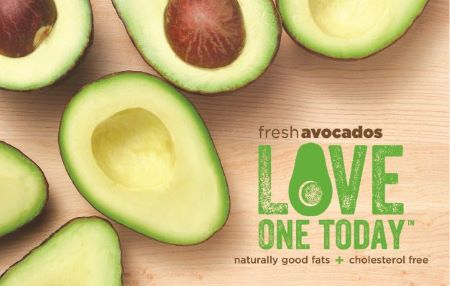

The dataset `avocado.csv` represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. The Average Price (of avocados) in the data reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- `Date` - The date of the observation
- `AveragePrice` - the average price of a single avocado
- `type` - conventional or organic
- `year` - the year
- `Region` - the city or region of the observation
- `Total Volume` - Total number of avocados sold
- `4046` - Total number of avocados with PLU 4046 sold
- `4225`- Total number of avocados with PLU 4225 sold
- `4770` - Total number of avocados with PLU 4770 sold

### Pre-processing

In [1]:
# import libraries
import numpy as np
import pandas as pd


In [2]:
# Read the dataset
df=pd.read_csv('avocado.csv')

In [3]:
# Show the first rows
df.iloc[0:1]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


### Clean the data

The first column is an index, so drop it out

In [4]:
# drop first column
#df.drop(Unnamed: 0,axis=1)
df=df.iloc[: , 1:]
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
# display data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
# display first few rows of data
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


What are 4046, 4225 and 4770?

This [link](http://bobbywires.com/plu-1.php?S=V&L=A&V=AVOCADOS) gives us a hint about avocado varieties:
- 4046 = Hass – small
- 4225 = Hass – large
- 4770 = Hass Extra Large

We rename the columns accordingly.


In [7]:
# rename the columns accordingly
df.rename(columns={"4046" : "Hass_small","4225" : "Hass_large", "4770" : "Hass_Extra_Large"},inplace=True)

In [8]:
# Show the last rows
df.tail()


,Date,AveragePrice,Total Volume,Hass_small,Hass_large,Hass_Extra_Large,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


---

# Descriptive Statistics

In [9]:
# Show the descriptive statistics using describe()     [1 point]

df.describe()

,AveragePrice,Total Volume,Hass_small,Hass_large,Hass_Extra_Large,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
# What is the mean AveragePrice? (notice that there is a column of named 'AveragePrice')     [1 point]
df.AveragePrice.mean()


1.405978409775878

In [11]:
# Print the mean with two decimals only       [1 point]
#Hint: use round()
df.AveragePrice.mean().round(2)


1.41

In [12]:
# What is the standard deviation of Average Price?        [1 point]
df.AveragePrice.std()


0.40267655549555065

In [13]:
# Printing the standard deviation of Average Price with two decimals only    [1 point]
df.AveragePrice.std().round(2)


0.4

If we compare the `data.head()` and `data.describe()`, we notice that 'type' and 'region' columns were dropped out from the descriptive statistics table as they were text (or categorical data). However, we can study how many unique values these variables contain and the distribution of the values.

In [14]:
# What are the unique type values?          [1 point]

df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [15]:
# How many rows i.e., observations there are for each type?         [1 point]

df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [16]:
# Display the descriptive statistics grouped by 'type'          [2 points]

df1=df.groupby('type').describe().T
df1

type                conventional      organic
AveragePrice count   9126.000000  9123.000000
             mean       1.158040     1.653999
             std        0.263041     0.363502
             min        0.460000     0.440000
             25%        0.980000     1.420000
...                          ...          ...
year         min     2015.000000  2015.000000
             25%     2015.000000  2015.000000
             50%     2016.000000  2016.000000
             75%     2017.000000  2017.000000
             max     2018.000000  2018.000000

[80 rows x 2 columns]

In [17]:
# Display the descriptive statistics for 'AveragePrice' grouped by 'type'               [2 points]

by_avP=df.groupby('type')
by_avP['AveragePrice'].describe().transpose()


type,conventional,organic
count,9126.000000,9123.000000
mean,1.158040,1.653999
std,0.263041,0.363502
min,0.460000,0.440000
25%,0.980000,1.420000
50%,1.130000,1.630000
75%,1.320000,1.870000
max,2.220000,3.250000


In [18]:
# Compare the mean of AveragePrice between different types?              [2 points]
by_avP['AveragePrice'].mean()


type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

<AxesSubplot:>

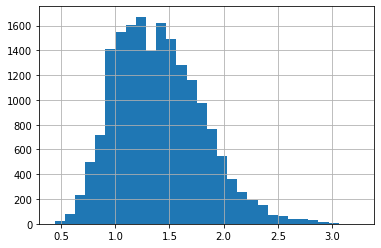

In [19]:
# Show the distribution of the average prices using Histogram? (Hint: use bins = 30)        [2 points]
df['AveragePrice'].hist(bins=30)


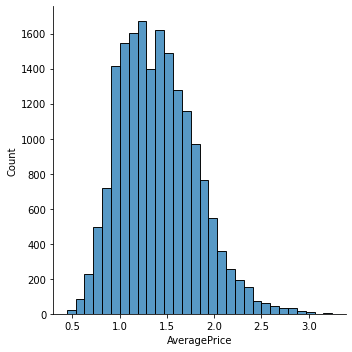

In [20]:
# Use a seaborn to create distribution plot of 'AveragePrice'             [2 points]
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(df['AveragePrice'],bins=30)
plt.show()


If we observe the distribution closely, it seems that we have two peaks in our distribution. Could this be due to different avocado types?

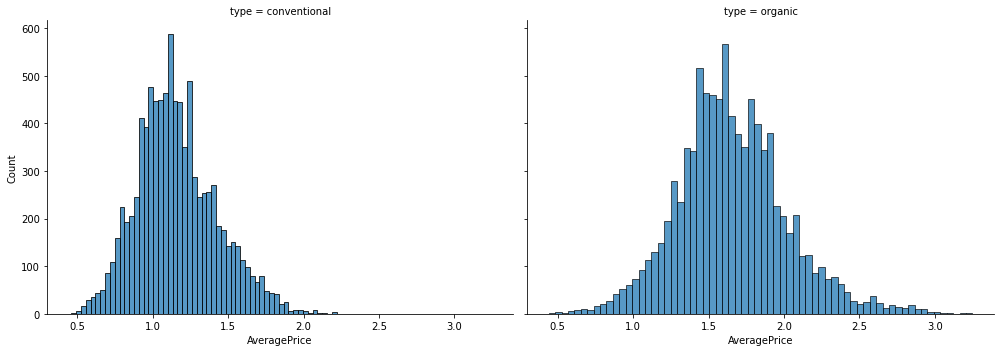

In [21]:
# Can we overlay the distribution of average price grouped by type?
#Hint: plot two distribution plot using seaborn for each type in a single figure           [10 points]

#set figure size
g = sns.FacetGrid(df, col="type",height = 5, aspect = 1.4)
g.map(sns.histplot, "AveragePrice");



<AxesSubplot:title={'center':'AveragePrice'}, xlabel='type'>

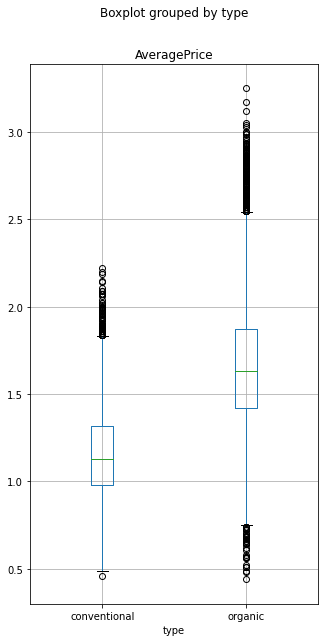

In [22]:
# Make a boxplot graph using pandas or seaborn to compare 'Avrage Price' by 'type'    [3 points]

#boxplot using pandas
df.boxplot(column='AveragePrice', by='type', figsize=(5,10))

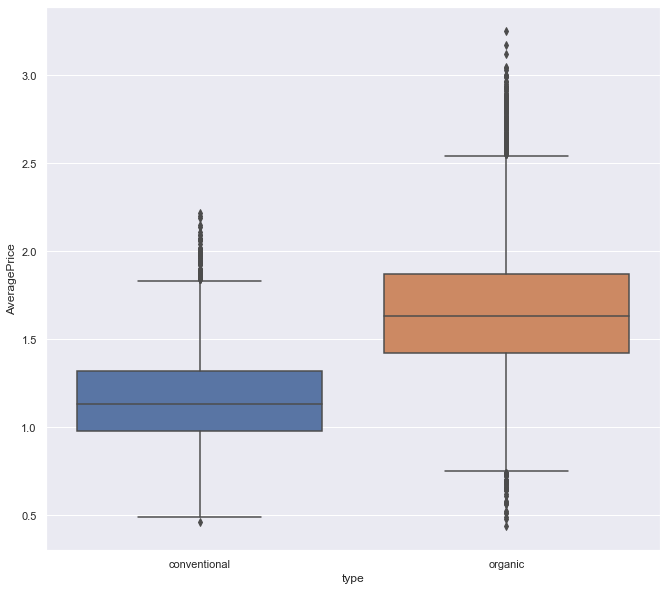

In [23]:
# boxplot with seaborn
sns.set(rc={'figure.figsize':(11,10)})
ax=sns.boxplot(y=df['AveragePrice'],x=df['type'])


---